# stellar spectra A (Cannon–Payne–Minnaert)

https://robrutten.nl/rrweb/rjr-edu/exercises/ssa/ssa.pdf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u
from plasmapy.particles import Particle

## Units and constants

In [ ]:
print(1*u.AA)
print((1*u.AA).to(u.nm))
print((1*u.AA).to(u.cm))

1.0 Angstrom
0.1 nm
1.0000000000000002e-08 cm


In [ ]:
print(1*u.erg)
print((1*u.erg).to(u.J))

1.0 erg
1.0000000000000001e-07 J


In [ ]:
print((1*u.dyne/u.cm**2))
print((1*u.dyne/u.cm**2).to(u.Pa))
print((1*u.dyne/u.cm**2).to(u.bar))
print(((1*u.dyne/u.cm**2).to(u.Pa))/const.atm, 'atm')

1.0 dyn / cm2
0.1 Pa
1e-06 bar
9.86923266716013e-07 atm


In [ ]:
print(1*u.eV)
print((1*u.eV).to(u.erg))

1.0 eV
1.6021766339999997e-12 erg


In [ ]:
print(((const.h *const.c)/(1*u.AA)).to(u.eV), 'for 1 angstrom')

12398.419843320024 eV for 1 angstrom


In [ ]:
print(const.c.to(u.cm/u.s))

29979245800.0 cm / s


In [ ]:
print(const.h.to(u.erg*u.s))

6.62607015e-27 erg s


In [ ]:
print(const.k_B.to(u.erg/u.K))
print(const.k_B.to(u.eV/u.K))

1.380649e-16 erg / K
8.617333262145179e-05 eV / K


In [ ]:
print(const.m_e.to(u.g))

9.1093837015e-28 g


In [ ]:
print(const.m_p.to(u.g))

1.67262192369e-24 g


In [ ]:
print(const.u.to(u.g))

1.6605390666e-24 g


In [ ]:
print(const.a0.to(u.cm))

5.2917721090299995e-09 cm


In [ ]:
H = Particle('H')
print(H.ionization_energy.to(u.eV))

13.598434599702 eV


## Saha-Boltzmann calibration of the Harvard sequence (Cecilia Payne)

### Schadee element

####  partition functions

In [ ]:
def partfunc_E(T):
    """
    partition functions Schadee element
    input: 
        T (temperature, K)
    output: 
        U = [U1, U2, U3, U4] partition functions for 4 ionization stages
    """
    U = np.zeros(4)                        
    chiion = [7,16,31,51]                  # Schadee ionization energies into integer array
    k = const.k_B.to(u.eV/u.K).value       # Boltzmann constant in eV/K
    for r in range(4):                     # loop over 4 ionization stages
        for s in range(chiion[r]):         # loop over all energy levels
            U[r] += np.exp(-s/(k*T))
    return U

In [ ]:
print(partfunc_E(T=5000))
print(partfunc_E(T=10000))
print(partfunc_E(T=20000))

[1.10887457 1.10887466 1.10887466 1.10887466]
[1.45590259 1.45633451 1.45633452 1.45633452]
[2.23242957 2.27133856 2.27154963 2.27154966]


#### Boltzmann routine

In [ ]:
def boltz_E(T, r, s):
    """
    compute Boltzmann population for level r,s of Schadee element E
    input: 
        T (temperature, K)
        r (ionization stage nr, 1 - 4 where 1 = neutral E)
        s (level nr, starting at s = 1)
    output:
        relative level population n_(r,s)/N_r
    """
    U = partfunc_E(T)
    k = const.k_B.to(u.eV/u.K).value
    relnrs = 1/U[r-1]*np.exp(-(s-1)/(k*T))
    return relnrs

In [ ]:
# T = 5000 K
for s in range(1, 16):
    print(s, boltz_E(5000, 1, s))

1 0.9018152560149962
2 0.08854457157306972
3 0.008693733115253592
4 0.000853592649854149
5 8.380984350746011e-05
6 8.22885467669519e-06
7 8.079486425021308e-07
8 7.93282947102913e-08
9 7.788834599875243e-09
10 7.647453490052588e-10
11 7.508638697174833e-11
12 7.372343638055087e-12
13 7.238522575073635e-13
14 7.107130600829292e-14
15 6.97812362306963e-15


In [ ]:
# T = 10000 K
for s in range(1, 16):
    print(s, boltz_E(10000, 1, s))

1 0.6868591389658425
2 0.21522358567610525
3 0.06743914320048579
4 0.021131689732463026
5 0.006621500359539954
6 0.002074811222693332
7 0.0006501308428703751
8 0.00020371497330859433
9 6.383298193775377e-05
10 2.0001718660577703e-05
11 6.267430053119345e-06
12 1.963865212651133e-06
13 6.153665123939827e-07
14 1.928217589152857e-07
15 6.041965229232406e-08


In [ ]:
# T = 20000 K
for s in range(1, 16):
    print(s, boltz_E(20000, 1, s))

1 0.447942463004354
2 0.25074560199732054
3 0.14036034114583942
4 0.0785697743435873
5 0.04398115158460637
6 0.02461941262869366
7 0.013781255295598592
8 0.007714359411690876
9 0.004318281597449989
10 0.0024172526790254842
11 0.0013531101162338106
12 0.0007574330158121521
13 0.00042398971566269707
14 0.00023733752719371545
15 0.00013285487768585397


#### Saha routine

In [ ]:
def saha_E(T, elpress, ionstage):
    """
    compute Saha population fraction N_r/N for Schadee element E
    input: 
        T (temperature, K)
        elpress (electron pressure, dyne/cm^2)
        ionstage (ionization stage, starting at 1 for neutral E)
    """
    # physical constants
    kerg = const.k_B.to(u.erg/u.K).value
    kev = const.k_B.to(u.eV/u.K).value
    h = const.h.to(u.erg*u.s).value
    elmass = const.m_e.to(u.g).value
    # kT and electron density
    kevT = kev*T
    kergT = kerg*T
    eldens = elpress/kergT

    chiion = [7,16,31,51] # ionization energies for element E
    U = partfunc_E(T)     # get partition functions U[0]...U[3]
    U = np.append(U,2)    # add estimated fifth value to get N_4 too
    sahaconst = (2*np.pi*elmass*kergT/h**2)**(1.5) * 2/eldens
    nstage = np.zeros(5)
    nstage[0] = 1         # relative fractions only (no abundance)
    for r in range(4):
        nstage[r+1] = nstage[r] * sahaconst * U[r+1]/U[r] * np.exp(-chiion[r]/kevT)
    ntotal = np.sum(nstage)  # sum all stages = element density
    nstagerel = nstage/ntotal # fractions of element density
    return nstagerel[ionstage-1]  # ion stages start at 1, Python at 0

In [ ]:
for r in range(1, 6):
    print(r, saha_E(5000, 1e3, r))

1 0.9060569814425261
2 0.09394301854921405
3 8.259860992024276e-12
4 5.517551687984846e-37
5 4.608449960562202e-82


In [ ]:
for r in range(1, 6):
    print(r, saha_E(10000, 1e3, r))

1 0.0004777697410961125
2 0.9450964753692418
3 0.05442575480327166
4 8.639040226864303e-11
5 1.5679745586501296e-29


In [ ]:
for r in range(1, 6):
    print(r, saha_E(20000, 1e3, r))

1 2.727906243817248e-10
2 0.00018028499452737282
3 0.6320126749978244
4 0.36780532008593114
5 1.7196489264449465e-06


In [ ]:
for r in range(1, 6):
    print(r, saha_E(20000, 1e1, r))

1 7.288071001684032e-16
2 4.816623898389871e-08
3 0.016885306303279907
4 0.9826552117247069
5 0.0004594338057734259


### Payne curves for schadeenium

In [ ]:
def sahabolt_E(T, elpress, ion, level):
    """
    compute Saha-Boltzmann population n_(r,s)/N for level r,s of element E
    input: temperature, electron pressure, ionization stage, level nr
    """
    return saha_E(T, elpress, ion) * boltz_E(T, ion, level)

In [ ]:
for s in range(1, 6):
    print(s, sahabolt_E(5000, 1e3, 1, s))

1 0.8170960086837664
2 0.08022642724261725
3 0.007877017583873599
4 0.0007734035797083774
5 7.59364938235398e-05


In [ ]:
for s in range(1, 6):
    print(s, sahabolt_E(20000, 1e3, 1, s))

1 1.221945041700454e-10
2 6.840104932982053e-11
3 3.828898509960544e-11
4 2.1433097800718405e-11
5 1.1997645801792058e-11


In [ ]:
for s in range(1, 6):
    print(s, sahabolt_E(10000, 1e3, 2, s))

1 0.6489556266134424
2 0.20334672566884868
3 0.06371759353721194
4 0.019965562331133755
5 0.006256100663399745


In [ ]:
for s in range(1, 6):
    print(s, sahabolt_E(20000, 1e3, 4, s))

1 0.16191823855274476
2 0.0906372794576055
3 0.050736201807185584
4 0.028400699902113632
5 0.01589791364350181


- Compute the ground-state populations $n_{r,1}/N$ for Payne's pressure ($P_e = 131 \;\; \text{dyne}\;\text{cm}^{-2})$ and a range of temperatures for each ion $r$, and plot them together in a Payne-like graph

[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000]


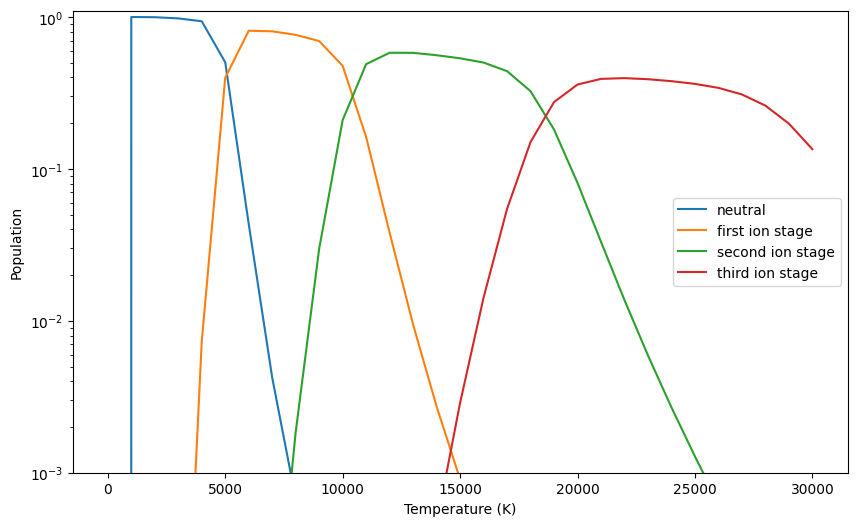

In [ ]:
T = np.arange(0, 30001, 1000)
print(T)
pop = np.zeros((5, len(T)))
for t in range(1, len(T)):
    for r in range(1, 5):
        pop[r, t] = sahabolt_E(T[t], 131, r, 1)

plt.figure(figsize=(10, 6))
plt.plot(T, pop[1, :], label='neutral')
plt.yscale('log')
plt.ylim(1e-3, 1.1)
plt.xlabel('Temperature (K)')
plt.ylabel('Population')
plt.plot(T, pop[2, :], label='first ion stage')
plt.plot(T, pop[3, :], label='second ion stage')
plt.plot(T, pop[4, :], label='third ion stage')
plt.legend()
plt.show()

[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000]


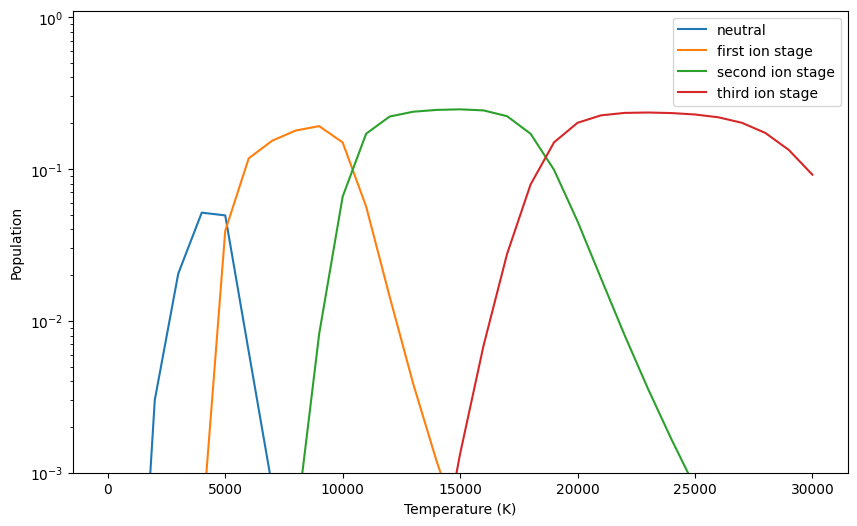

In [ ]:
# repeat for s=2 (excitation energy = 1 eV)

T = np.arange(0, 30001, 1000)
print(T)
pop = np.zeros((5, len(T)))
for t in range(1, len(T)):
    for r in range(1, 5):
        pop[r, t] = sahabolt_E(T[t], 131, r, 2)

plt.figure(figsize=(10, 6))
plt.plot(T, pop[1, :], label='neutral')
plt.yscale('log')
plt.ylim(1e-3, 1.1)
plt.xlabel('Temperature (K)')
plt.ylabel('Population')
plt.plot(T, pop[2, :], label='first ion stage')
plt.plot(T, pop[3, :], label='second ion stage')
plt.plot(T, pop[4, :], label='third ion stage')
plt.legend()
plt.show()

[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000]


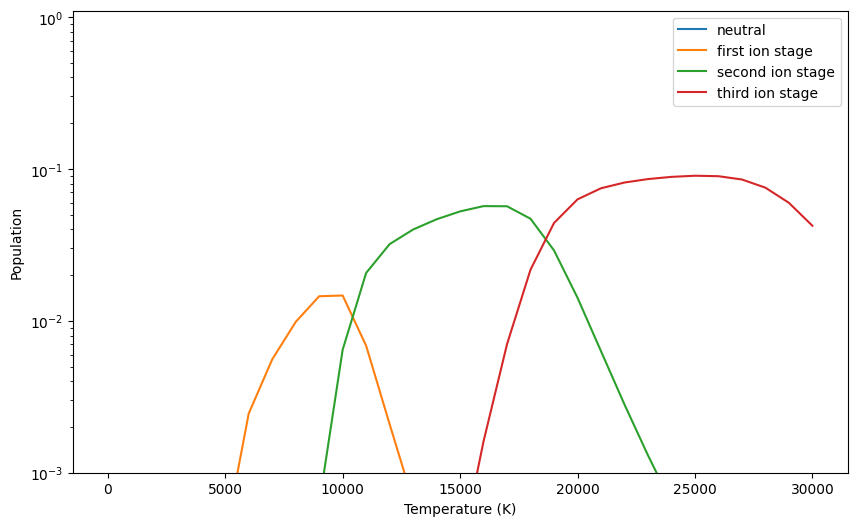

In [ ]:
# repeat for s=4 (excitation energy = 3 eV)

T = np.arange(0, 30001, 1000)
print(T)
pop = np.zeros((5, len(T)))
for t in range(1, len(T)):
    for r in range(1, 5):
        pop[r, t] = sahabolt_E(T[t], 131, r, 4)

plt.figure(figsize=(10, 6))
plt.plot(T, pop[1, :], label='neutral')
plt.yscale('log')
plt.ylim(1e-3, 1.1)
plt.xlabel('Temperature (K)')
plt.ylabel('Population')
plt.plot(T, pop[2, :], label='first ion stage')
plt.plot(T, pop[3, :], label='second ion stage')
plt.plot(T, pop[4, :], label='third ion stage')
plt.legend()
plt.show()

### Saha-Boltzmann populations of hydrogen

$$
g_{1, s} = 2 s^2
$$

$$
\chi_{1,s} = 13.598(1 - 1/s^2) \;\; \text{eV}
$$

$$
U_2 = g_{2,1} = 1
$$

In [ ]:
def sahabolt_H(T, elpress, level):
    """
    compute Saha-Boltzmann population n_(1,s)/N_H for hydrogen level
    input: temperature, electron pressure, level number
    """  
    # physical constants
    kerg = const.k_B.to(u.erg/u.K).value
    kev = const.k_B.to(u.eV/u.K).value
    h = const.h.to(u.erg*u.s).value
    elmass = const.m_e.to(u.g).value

    # kT and electron density
    kevT = kev*T
    kergT = kerg*T
    eldens = elpress/kergT

    # energy levels and weights for hydrogen
    nrlevels = 100  # reasonable partition function cut-off value
    g = np.zeros((2, nrlevels)) # declaration weights (too many for proton)
    chiexc = np.zeros((2, nrlevels)) # declaration excitation energies (idem)
    for s in range(nrlevels):
        g[0,s] = 2*(s+1)**2                  # statistical weights
        chiexc[0,s] = 13.598*(1-1/(s+1)**2)  # excitation energies
    g[1,0] = 1  # statistical weight free proton
    chiexc[1,0] = 0  # excitation energy proton ground state

    # partition functions
    U = np.zeros(2)
    U[0] = 0
    for s in range(nrlevels):
        U[0] += g[0,s] * np.exp(-chiexc[0,s]/kevT)
    U[1] = g[1,0]
    # print(U)  [2.0, 1.0]

    # Saha
    sahaconst = (2*np.pi*elmass*kergT/h**2)**(1.5) * 2/eldens
    nstage = np.zeros(2)
    nstage[0] = 1  # relative fractions only
    nstage[1] = nstage[0] * sahaconst * U[1]/U[0] * np.exp(-13.598/kevT)
    ntotal = np.sum(nstage)  # sum both stages = total hydrogen density

    # Boltzmann
    nlevel = nstage[0] * g[0,level-1] / U[0] * np.exp(-chiexc[0,level-1]/kevT) 
    nlevelrel = nlevel/ntotal  # fraction of total hydrogen density

    return nlevelrel, g, chiexc, kevT

In [ ]:
nlevelrel, g, chiexc, kevT = sahabolt_H(5000, 1e2, 1)
for s in range(0, 6):
    print(f'{s+1:3d} {int(g[0, s]):8d} {chiexc[0, s]:10.4f} {g[0, s]*np.exp(-chiexc[0, s]/kevT):15.7e}')

  1        2     0.0000   2.0000000e+00
  2        8    10.1985   4.2019843e-10
  3       18    12.0871   1.1803226e-11
  4       32    12.7481   4.5248639e-12
  5       50    13.0541   3.4756536e-12
  6       72    13.2203   3.4031335e-12


In [ ]:
nlevelrel, g, chiexc, kevT = sahabolt_H(5000, 1e2, 1)
for s in np.arange(0, 100, 10):
    print(f'{s+1:3d} {int(g[0, s]):8d} {chiexc[0, s]:10.4f} {g[0, s]*np.exp(-chiexc[0, s]/kevT):15.7e}')

  1        2     0.0000   2.0000000e+00
 11      242    13.4856   6.1788668e-12
 21      882    13.5672   1.8636640e-11
 31     1922    13.5839   3.9069247e-11
 41     3362    13.5899   6.7386134e-11
 51     5202    13.5928   1.0357601e-10
 61     7442    13.5943   1.4763604e-10
 71    10082    13.5953   1.9956523e-10
 81    13122    13.5959   2.5936318e-10
 91    16562    13.5964   3.2702968e-10


### Ca II K vs H alpha

In [ ]:
def sahabolt_H(T, elpress, level):
    """
    compute Saha-Boltzmann population n_(1,s)/N_H for hydrogen level
    input: temperature, electron pressure, level number
    """  
    # physical constants
    kerg = const.k_B.to(u.erg/u.K).value
    kev = const.k_B.to(u.eV/u.K).value
    h = const.h.to(u.erg*u.s).value
    elmass = const.m_e.to(u.g).value

    # kT and electron density
    kevT = kev*T
    kergT = kerg*T
    eldens = elpress/kergT

    # energy levels and weights for hydrogen
    nrlevels = 100  # reasonable partition function cut-off value
    g = np.zeros((2, nrlevels)) # declaration weights (too many for proton)
    chiexc = np.zeros((2, nrlevels)) # declaration excitation energies (idem)
    for s in range(nrlevels):
        g[0,s] = 2*(s+1)**2                  # statistical weights
        chiexc[0,s] = 13.598*(1-1/(s+1)**2)  # excitation energies
    g[1,0] = 1  # statistical weight free proton
    chiexc[1,0] = 0  # excitation energy proton ground state

    # partition functions
    U = np.zeros(2)
    U[0] = 0
    for s in range(nrlevels):
        U[0] += g[0,s] * np.exp(-chiexc[0,s]/kevT)
    U[1] = g[1,0]
    # print(U)  [2.0, 1.0]

    # Saha
    sahaconst = (2*np.pi*elmass*kergT/h**2)**(1.5) * 2/eldens
    nstage = np.zeros(2)
    nstage[0] = 1  # relative fractions only
    nstage[1] = nstage[0] * sahaconst * U[1]/U[0] * np.exp(-13.598/kevT)
    ntotal = np.sum(nstage)  # sum both stages = total hydrogen density

    # Boltzmann
    nlevel = nstage[0] * g[0,level-1] / U[0] * np.exp(-chiexc[0,level-1]/kevT) 
    nlevelrel = nlevel/ntotal  # fraction of total hydrogen density

    return nlevelrel

In [ ]:
def sahabolt_Ca(T, elpress, ion, level):
    """
    compute Saha population fraction N_r/N for Ca (copy from Schadee E) 
    input: 
        T (temperature, K)
        elpress (electron pressure, dyne/cm^2)
        ion (ionization stage, starting at 1 for neutral Ca)
        level (level nr, starting at 1)
    """
    # physical constants
    kerg = const.k_B.to(u.erg/u.K).value
    kev = const.k_B.to(u.eV/u.K).value
    h = const.h.to(u.erg*u.s).value
    elmass = const.m_e.to(u.g).value

    # kT and electron density
    kevT = kev*T
    kergT = kerg*T
    eldens = elpress/kergT

    # energy levels, partition functions
    chiion = [6.113,11.871,50.91,67.15]
    U = partfunc_E(T)

    # Saha
    sahaconst = (2*np.pi*elmass*kergT/h**2)**(1.5) * 2/eldens
    nstage = np.zeros(5)
    nstage[0] = 1         # relative fractions only
    for r in range(3):
        nstage[r+1] = nstage[r] * sahaconst * U[r+1]/U[r] * np.exp(-chiion[r]/kevT)
    ntotal = np.sum(nstage)  # sum all stages = element density
    nstagerel = nstage/ntotal # fractions of element density
    
    relnrs = 1/U[ion-1]*np.exp(-(level-1)/(kevT))
    return nstagerel[ion-1] * relnrs

In [ ]:
temp = np.arange(1000, 20000+1, 100)
CaH = np.zeros_like(temp).astype(np.float128)
Caabund = 2e-6  # A_Ca = N_Ca / N_H
for i in range(len(temp)):
    NCa = sahabolt_Ca(temp[i], 1e2, 2, 1)
    NH = sahabolt_H(temp[i], 1e2, 2)
    CaH[i] = (NCa/NH)*Caabund

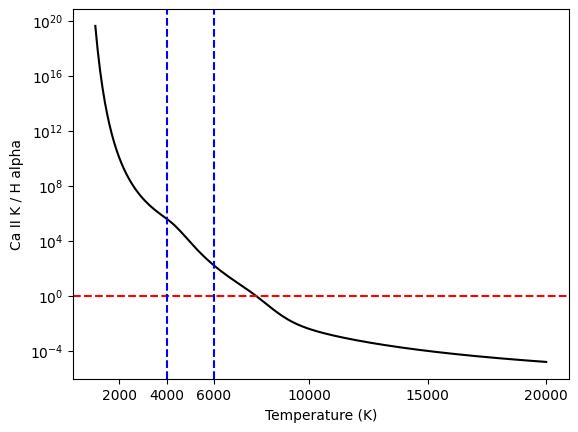

In [ ]:
plt.plot(temp, CaH, c='k')
plt.yscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Ca II K / H alpha')
plt.axhline(1, c='r', ls='--')
plt.axvline(4000, c='b', ls='--')
plt.axvline(6000, c='b', ls='--')
plt.xticks([2000, 4000, 6000, 10000, 15000, 20000])
plt.yticks([1e-4, 1, 1e4, 1e8, 1e12, 1e16, 1e20])
plt.show()

In [ ]:
print('Ca/H ratio at 5000 K:', CaH[temp == 5000][0])

Ca/H ratio at 5000 K: 7643.678243575805027


### Ca II K vs H alpha: temperature sensitivity

In [ ]:
temp = np.arange(2000, 12000+1, 100)
dNCadT = np.zeros_like(temp).astype(np.float128)
dNHdT = np.zeros_like(temp).astype(np.float128)
dT = 1.
for i in range(len(temp)):
    NCa = sahabolt_Ca(temp[i], 1e2, 2, 1)  # Ca ion ground state
    NCa2 = sahabolt_Ca(temp[i]-dT, 1e2, 2, 1)  # idem dT cooler
    dNCadT[i] = (NCa - NCa2)/dT/NCa  # fractional diff quotient
    NH = sahabolt_H(temp[i], 1e2, 2)  # H atom 2nd level
    NH2 = sahabolt_H(temp[i]-dT, 1e2, 2)  # idem dT cooler
    dNHdT[i] = (NH - NH2)/dT/NH  # fractional diff quotient

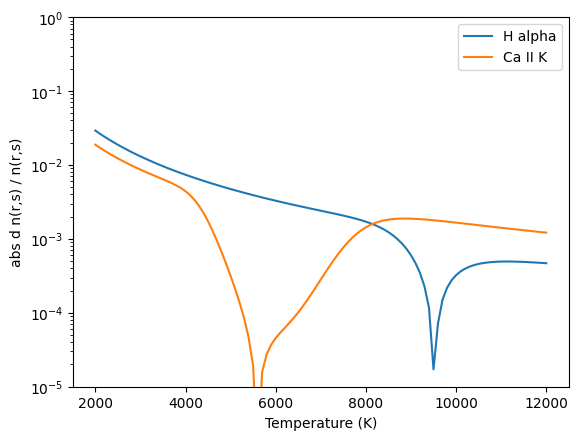

In [ ]:
plt.plot(temp, abs(dNHdT), label='H alpha')
plt.plot(temp, abs(dNCadT), label='Ca II K')
plt.yscale('log')
plt.ylim(1e-5, 1)
plt.xlabel('Temperature (K)')
plt.ylabel('abs d n(r,s) / n(r,s)')
plt.legend()
plt.show()

In [ ]:
temp = np.arange(2000, 12000+1, 100)
NCa = np.zeros_like(temp).astype(np.float128)
NH = np.zeros_like(temp).astype(np.float128)
for i in range(len(temp)):
    NCa[i] = sahabolt_Ca(temp[i], 1e2, 2, 1)  # Ca ion ground state
    NH[i] = sahabolt_H(temp[i], 1e2, 2)  # H atom 2nd level

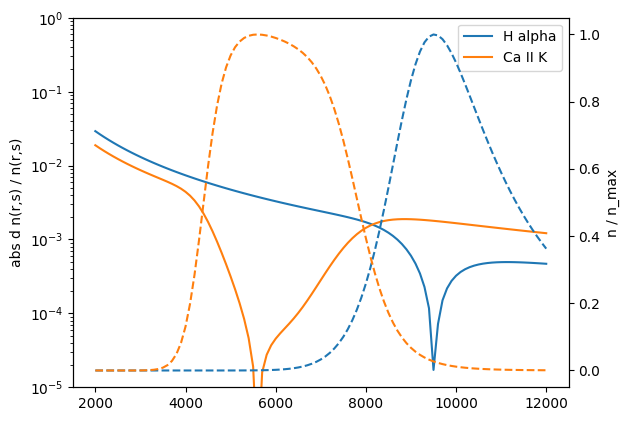

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.xlabel('Temperature (K)')

ax1.plot(temp, abs(dNHdT), label='H alpha', c='C0')
ax1.plot(temp, abs(dNCadT), label='Ca II K', c='C1')
ax1.set_yscale('log')
ax1.set_ylim(1e-5, 1)
ax1.legend()
ax1.set_ylabel('abs d n(r,s) / n(r,s)')

ax2.plot(temp, NH/np.max(NH), c='C0', ls='--')
ax2.plot(temp, NCa/np.max(NCa), c='C1', ls='--')
ax2.set_ylabel('n / n_max')

plt.show()

### Hot stars vs Cool stars

Find at which temperature the hydrogen in stellar photospheres with $P_e = 10^2$ is about 50% ionized.

In [ ]:
for T in np.arange(1000, 20000+1, 1000):
    print(f'{T:6.0f} {sahabolt_H(T, 1e2, 1):.7g}')

  1000 1
  2000 1
  3000 1
  4000 1
  5000 0.9999999
  6000 0.9999635
  7000 0.9977338
  8000 0.949918
  9000 0.6132796
 10000 0.1747189
 11000 0.03830189
 12000 0.009616532
 13000 0.002885765
 14000 0.00101032
 15000 0.0004015865
 16000 0.000177214
 17000 8.530125e-05
 18000 4.416854e-05
 19000 2.433126e-05
 20000 1.413319e-05


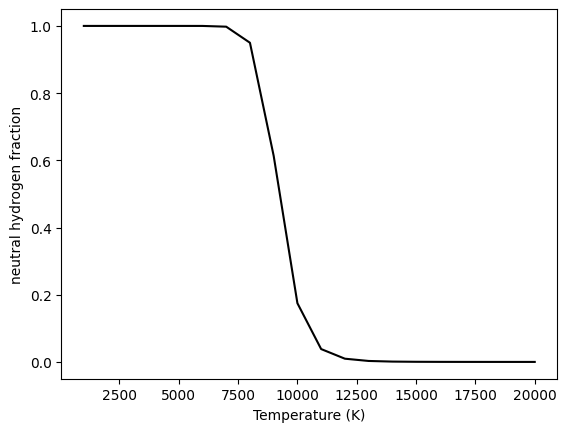

In [ ]:
temp = np.arange(1000, 20000+1, 1000)
nH = np.zeros_like(temp).astype(np.float64)
for i in range(len(temp)):
    nH[i] = sahabolt_H(temp[i], 1e2, 1)
plt.plot(temp, nH, c='k')
plt.xlabel('Temperature (K)')
plt.ylabel('neutral hydrogen fraction')
plt.show()

## Fraunhofer line strengths and the curve of growth (Marcel Minnaert)

In [ ]:
def planck(T, wav):
    """
    compute Planck function B_lambda(T) in cgs units
    input: 
        T (temperature, K)
        wav (wavelength, cm)
    output:
        B_lambda in erg/cm^2/s/cm/sr
    """
    h = const.h.cgs.value
    c = const.c.cgs.value
    k = const.k_B.cgs.value
    return (2*h*c**2/wav**5) / (np.exp(h*c/(wav*k*T)) - 1)

In [ ]:
print(f'{planck(5000, 5000e-8):.7e}')

1.2107191e+14


[ 1000.  1200.  1400.  1600.  1800.  2000.  2200.  2400.  2600.  2800.
  3000.  3200.  3400.  3600.  3800.  4000.  4200.  4400.  4600.  4800.
  5000.  5200.  5400.  5600.  5800.  6000.  6200.  6400.  6600.  6800.
  7000.  7200.  7400.  7600.  7800.  8000.  8200.  8400.  8600.  8800.
  9000.  9200.  9400.  9600.  9800. 10000. 10200. 10400. 10600. 10800.
 11000. 11200. 11400. 11600. 11800. 12000. 12200. 12400. 12600. 12800.
 13000. 13200. 13400. 13600. 13800. 14000. 14200. 14400. 14600. 14800.
 15000. 15200. 15400. 15600. 15800. 16000. 16200. 16400. 16600. 16800.
 17000. 17200. 17400. 17600. 17800. 18000. 18200. 18400. 18600. 18800.
 19000. 19200. 19400. 19600. 19800. 20000. 20200. 20400. 20600. 20800.]


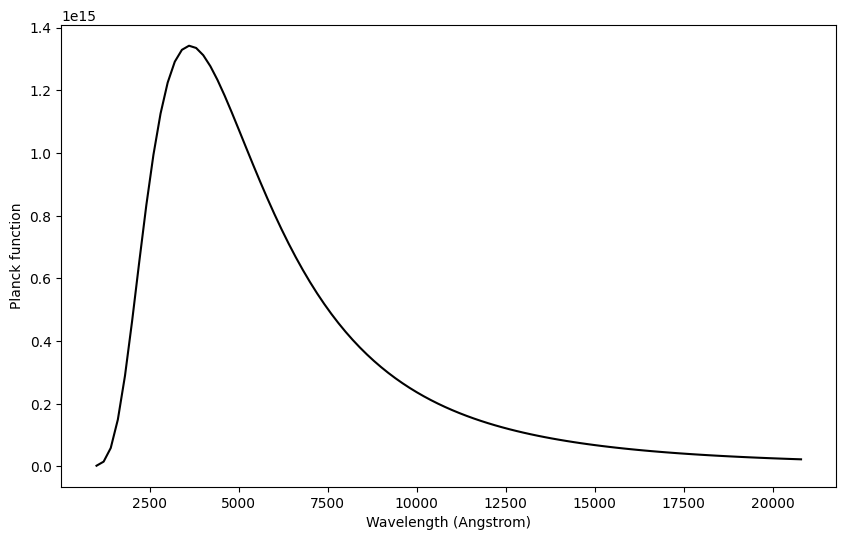

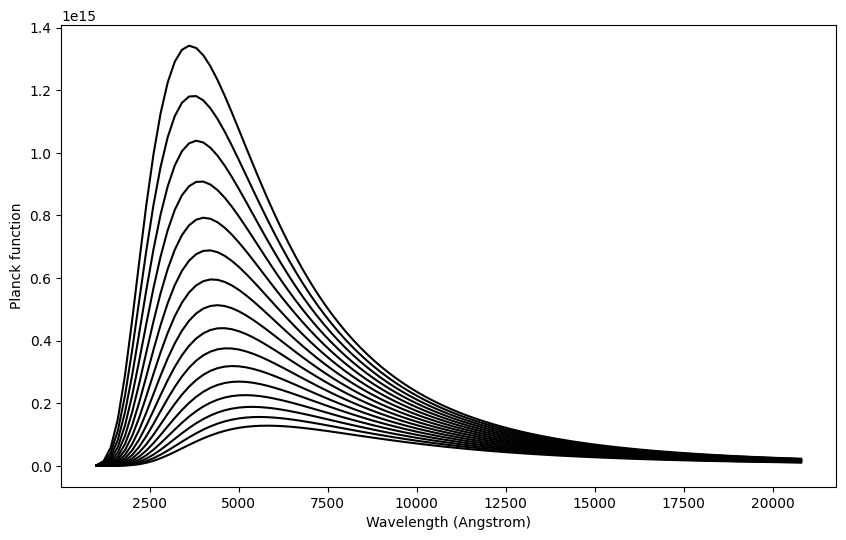

In [ ]:
wav = np.linspace(1000, 20800, 100)
print(wav)
b = np.zeros_like(wav)
for i in range(len(wav)):
    b[i] = planck(8000, wav[i]*1e-8)

plt.figure(figsize=(10, 6))
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Planck function')
plt.plot(wav, b, c='k')
plt.show()

plt.figure(figsize=(10, 6))
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Planck function')
for T in np.arange(8000, 5000-1, -200):
    for i in range(len(wav)):
        b[i] = planck(T, wav[i]*1e-8)
    plt.plot(wav, b, label=f'{T} K', c='k')
plt.show()

[ 1000.  1200.  1400.  1600.  1800.  2000.  2200.  2400.  2600.  2800.
  3000.  3200.  3400.  3600.  3800.  4000.  4200.  4400.  4600.  4800.
  5000.  5200.  5400.  5600.  5800.  6000.  6200.  6400.  6600.  6800.
  7000.  7200.  7400.  7600.  7800.  8000.  8200.  8400.  8600.  8800.
  9000.  9200.  9400.  9600.  9800. 10000. 10200. 10400. 10600. 10800.
 11000. 11200. 11400. 11600. 11800. 12000. 12200. 12400. 12600. 12800.
 13000. 13200. 13400. 13600. 13800. 14000. 14200. 14400. 14600. 14800.
 15000. 15200. 15400. 15600. 15800. 16000. 16200. 16400. 16600. 16800.
 17000. 17200. 17400. 17600. 17800. 18000. 18200. 18400. 18600. 18800.
 19000. 19200. 19400. 19600. 19800. 20000. 20200. 20400. 20600. 20800.]


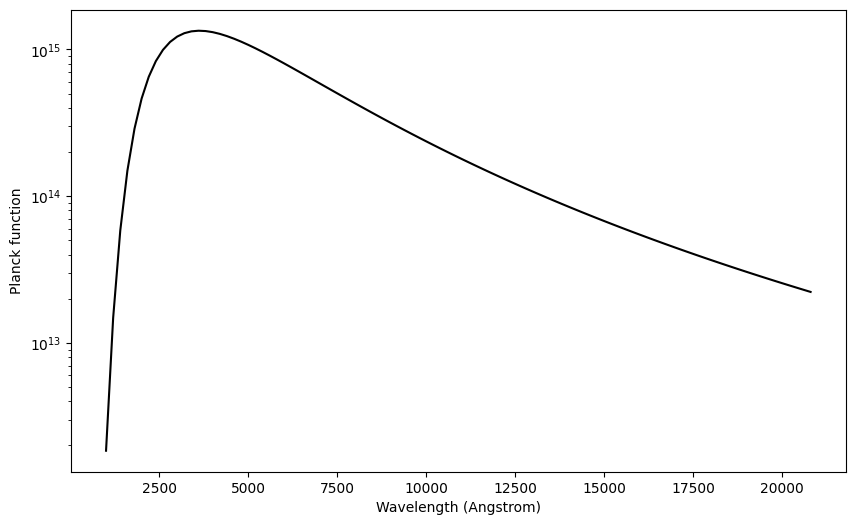

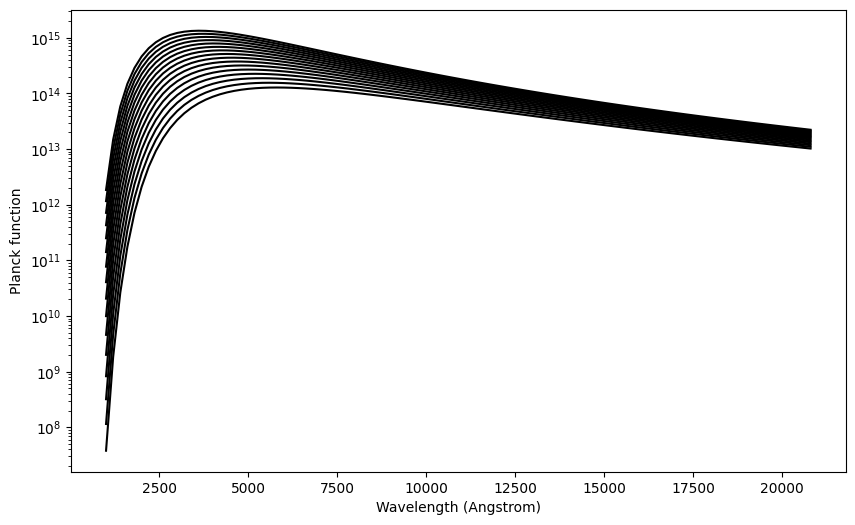

In [ ]:
wav = np.linspace(1000, 20800, 100)
print(wav)
b = np.zeros_like(wav)
for i in range(len(wav)):
    b[i] = planck(8000, wav[i]*1e-8)

plt.figure(figsize=(10, 6))
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Planck function')
plt.yscale('log')
plt.plot(wav, b, c='k')
plt.show()

plt.figure(figsize=(10, 6))
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Planck function')
plt.yscale('log')
for T in np.arange(8000, 5000-1, -200):
    for i in range(len(wav)):
        b[i] = planck(T, wav[i]*1e-8)
    plt.plot(wav, b, label=f'{T} K', c='k')
plt.show()

[ 1000.  1200.  1400.  1600.  1800.  2000.  2200.  2400.  2600.  2800.
  3000.  3200.  3400.  3600.  3800.  4000.  4200.  4400.  4600.  4800.
  5000.  5200.  5400.  5600.  5800.  6000.  6200.  6400.  6600.  6800.
  7000.  7200.  7400.  7600.  7800.  8000.  8200.  8400.  8600.  8800.
  9000.  9200.  9400.  9600.  9800. 10000. 10200. 10400. 10600. 10800.
 11000. 11200. 11400. 11600. 11800. 12000. 12200. 12400. 12600. 12800.
 13000. 13200. 13400. 13600. 13800. 14000. 14200. 14400. 14600. 14800.
 15000. 15200. 15400. 15600. 15800. 16000. 16200. 16400. 16600. 16800.
 17000. 17200. 17400. 17600. 17800. 18000. 18200. 18400. 18600. 18800.
 19000. 19200. 19400. 19600. 19800. 20000. 20200. 20400. 20600. 20800.]


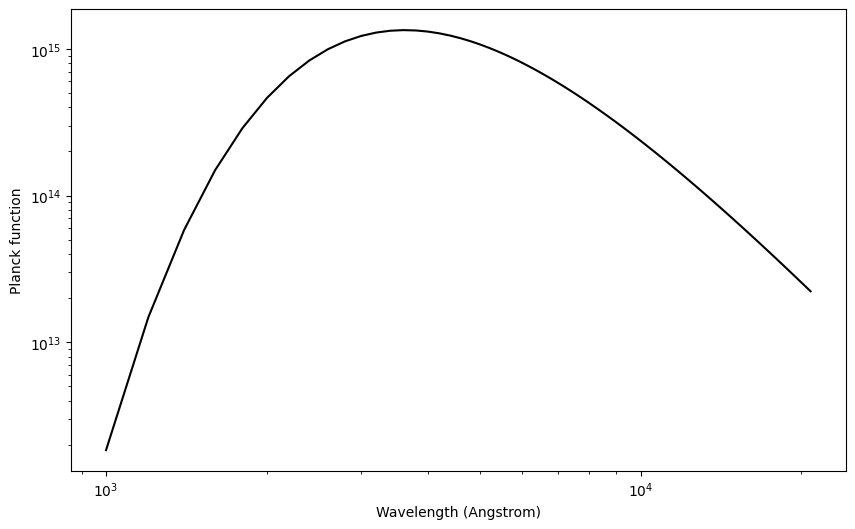

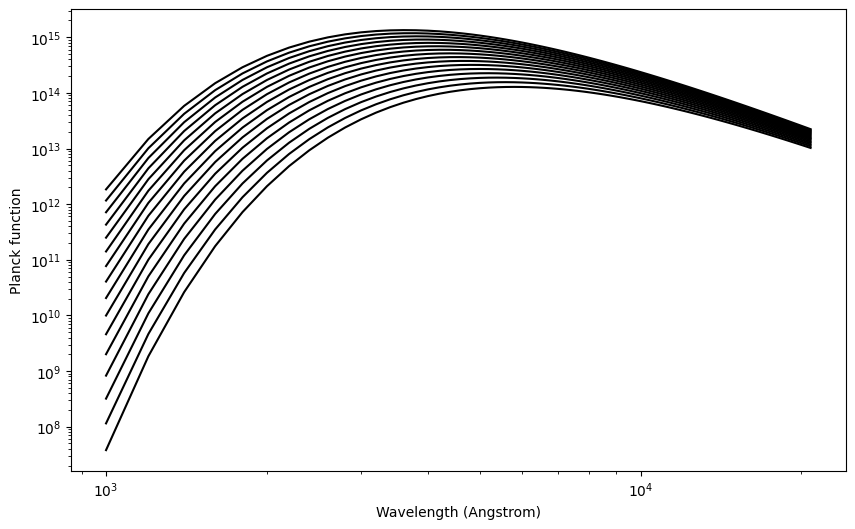

In [ ]:
wav = np.linspace(1000, 20800, 100)
print(wav)
b = np.zeros_like(wav)
for i in range(len(wav)):
    b[i] = planck(8000, wav[i]*1e-8)

plt.figure(figsize=(10, 6))
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Planck function')
plt.yscale('log')
plt.xscale('log')
plt.plot(wav, b, c='k')
plt.show()

plt.figure(figsize=(10, 6))
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Planck function')
plt.yscale('log')
plt.xscale('log')
for T in np.arange(8000, 5000-1, -200):
    for i in range(len(wav)):
        b[i] = planck(T, wav[i]*1e-8)
    plt.plot(wav, b, label=f'{T} K', c='k')
plt.show()

### Radiation through an isothermal layer

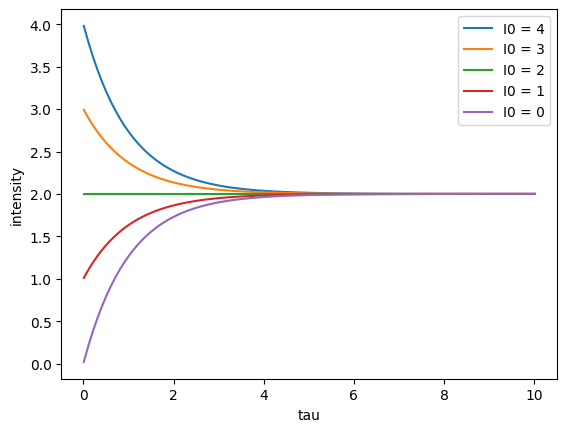

In [ ]:
B = 2
tau = np.arange(101)/10 + 0.01
intensity = np.zeros_like(tau)
plt.figure()
plt.xlabel('tau')
plt.ylabel('intensity')
for I0 in np.arange(4, -1, -1):
    for i in np.arange(0, 101):
        intensity[i] = I0*np.exp(-tau[i]) + B*(1-np.exp(-tau[i]))
    plt.plot(tau, intensity, label=f'I0 = {I0}')
plt.legend()
plt.show()

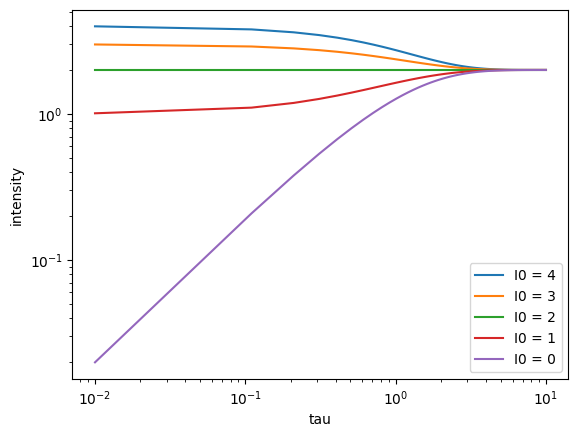

In [ ]:
B = 2
tau = np.arange(101)/10 + 0.01
intensity = np.zeros_like(tau)
plt.figure()
plt.xlabel('tau')
plt.ylabel('intensity')
plt.xscale('log')
plt.yscale('log')
for I0 in np.arange(4, -1, -1):
    for i in np.arange(0, 101):
        intensity[i] = I0*np.exp(-tau[i]) + B*(1-np.exp(-tau[i]))
    plt.plot(tau, intensity, label=f'I0 = {I0}')
plt.legend()
plt.show()

### Voigt profile

In [ ]:
from functools import partial
from astropy.modeling.models import Voigt1D

def vogit_approx(x, a):
    """
    approximate Voigt profile
    """
    return (1/np.sqrt(np.pi)) * (np.exp(-x**2) + a/(np.sqrt(np.pi)*x**2))

def H(x, a):
    """
    Voigt profile
    """
    return Voigt1D(amplitude_L=2/(np.pi*a), fwhm_L=a, fwhm_G=2*np.sqrt(np.log(2)))(x)

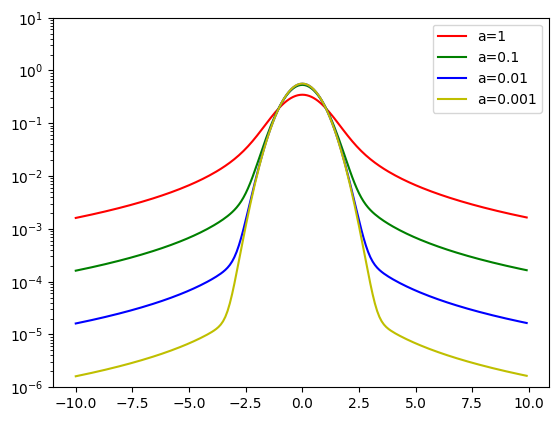

In [ ]:
x = np.arange(-10, 10, 0.1)
aa = [1, 0.1, 0.01, 0.001]
clrs = ['r', 'g', 'b', 'y']
plt.figure()
for i in range(len(aa)):
    a = aa[i]
    v1 = partial(H, a=a)
    plt.plot(x, v1(x), label=f'a={a}', c=clrs[i])

plt.ylim(1e-6, 1e1)
plt.legend()
plt.yscale('log')
plt.show()

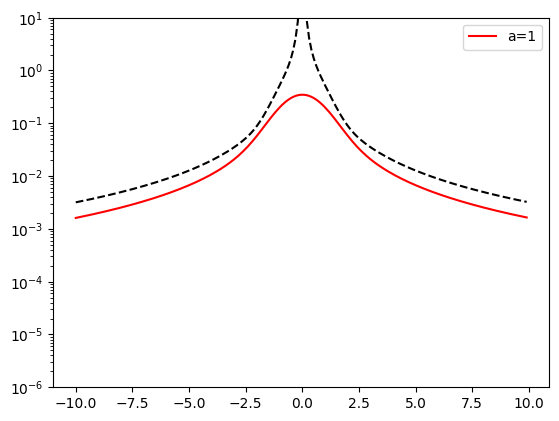

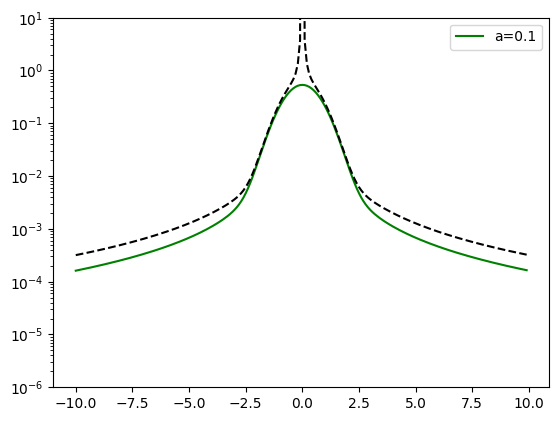

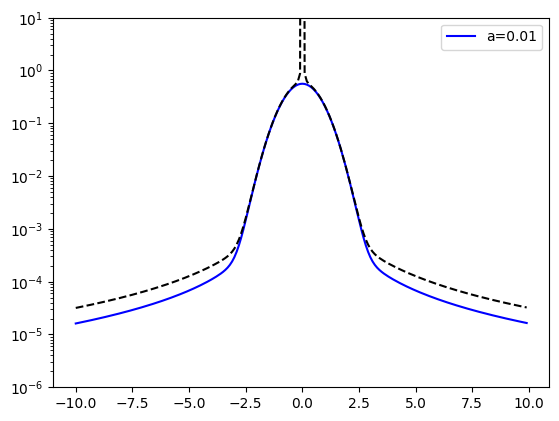

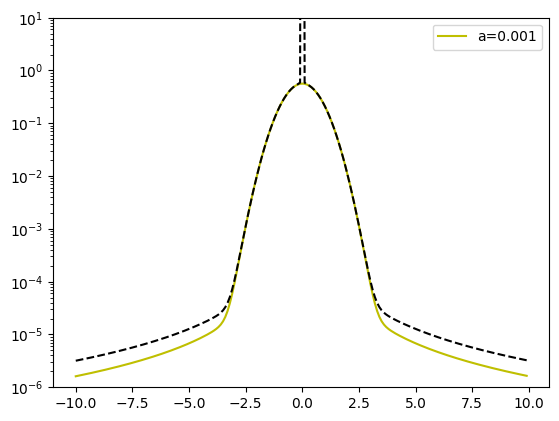

In [ ]:
x = np.arange(-10, 10, 0.1)
aa = [1, 0.1, 0.01, 0.001]
clrs = ['r', 'g', 'b', 'y']
for i in range(len(aa)):
    plt.figure()
    a = aa[i]
    v1 = partial(H, a=a)
    plt.plot(x, v1(x), label=f'a={a}', c=clrs[i])
    vaprox = partial(vogit_approx, a=a)
    plt.plot(x, vaprox(x), c='k', ls='--')
    plt.ylim(1e-6, 1e1)
    plt.legend()
    plt.yscale('log')
    plt.show()

### Schuster-Schwarzschild line profiles

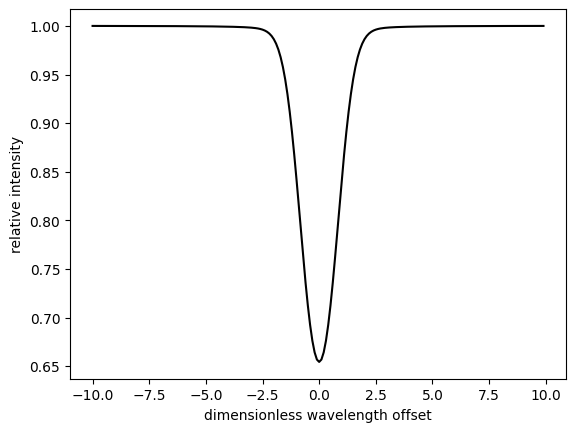

In [ ]:
Ts = 5700      # solar surface temperature
Tl = 4200      # solar T-min temperature = 'reversing layer'
a = 0.1        # damping parameter
wav = 5000e-8  # wavelength 5000 Angstrom [cm]
tau0 = 1.0     # reversing layer thickness at line center
x  = np.arange(-10, 10, 0.1)
intensity = np.zeros_like(x)
for i in range(len(x)):
    tau = tau0 * H(x[i], a)
    intensity[i] = planck(Ts, wav) * np.exp(-tau) + planck(Tl, wav) * (1 - np.exp(-tau))
plt.plot(x, intensity/np.max(intensity), c='k')
plt.xlabel('dimensionless wavelength offset')
plt.ylabel('relative intensity')
plt.show()

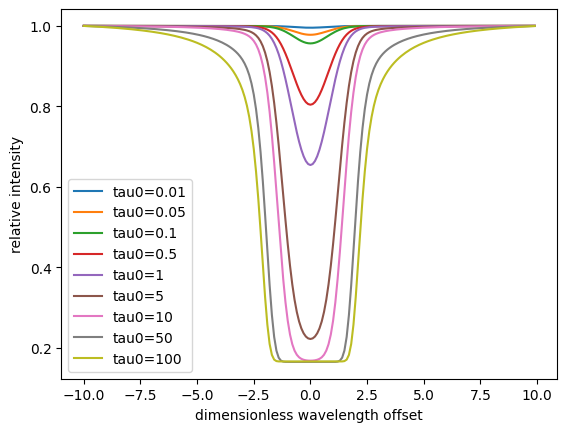

In [ ]:
plt.figure()
plt.xlabel('dimensionless wavelength offset')
plt.ylabel('relative intensity')

Ts = 5700      # solar surface temperature
Tl = 4200      # solar T-min temperature = 'reversing layer'
a = 0.1        # damping parameter
wav = 5000e-8  # wavelength 5000 Angstrom [cm]
tau0 = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
x  = np.arange(-10, 10, 0.1)
intensity = np.zeros_like(x)
for itau in range(len(tau0)):
    for i in range(len(x)):
        tau = tau0[itau] * H(x[i], a)
        intensity[i] = planck(Ts, wav) * np.exp(-tau) + planck(Tl, wav) * (1 - np.exp(-tau))
    plt.plot(x, intensity/np.max(intensity), label=f'tau0={tau0[itau]}')
plt.legend()
plt.show()

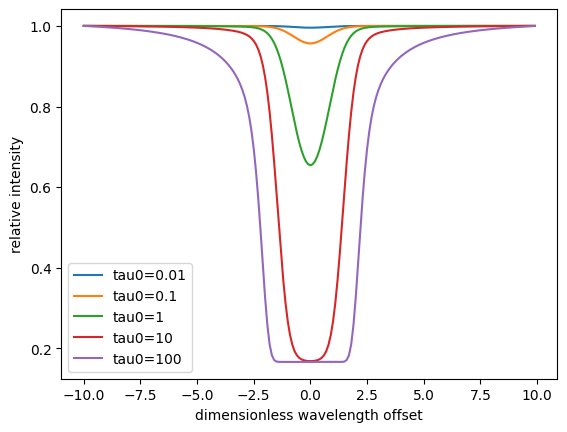

In [ ]:
plt.figure()
plt.xlabel('dimensionless wavelength offset')
plt.ylabel('relative intensity')

Ts = 5700      # solar surface temperature
Tl = 4200      # solar T-min temperature = 'reversing layer'
a = 0.1        # damping parameter
wav = 5000e-8  # wavelength 5000 Angstrom [cm]
tau0 = [0.01, 0.1, 1, 10, 100]
x  = np.arange(-10, 10, 0.1)
intensity = np.zeros_like(x)
for itau in range(len(tau0)):
    for i in range(len(x)):
        tau = tau0[itau] * H(x[i], a)
        intensity[i] = planck(Ts, wav) * np.exp(-tau) + planck(Tl, wav) * (1 - np.exp(-tau))
    plt.plot(x, intensity/np.max(intensity), label=f'tau0={tau0[itau]}')
plt.legend()
plt.show()

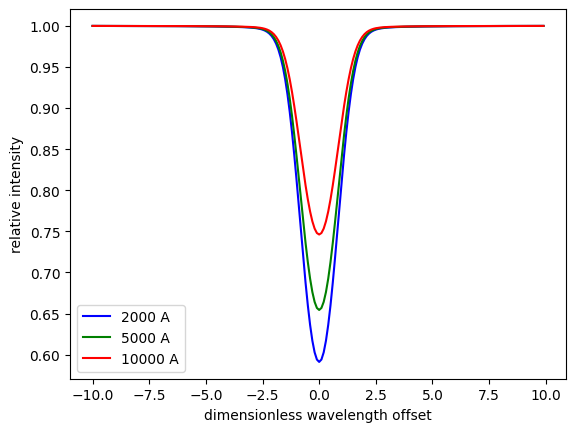

In [ ]:
plt.figure()
plt.xlabel('dimensionless wavelength offset')
plt.ylabel('relative intensity')

Ts = 5700      # solar surface temperature
Tl = 4200      # solar T-min temperature = 'reversing layer'
a = 0.1        # damping parameter
wav = [2000, 5000, 10000] # wavelength [angstrom]
tau0 = 1.0     # reversing layer thickness at line center
clrs =['b', 'g', 'r']
x  = np.arange(-10, 10, 0.1)
intensity = np.zeros_like(x)
for iw in range(len(wav)):
    w = wav[iw]*1e-8
    for i in range(len(x)):
        tau = tau0 * H(x[i], a)
        intensity[i] = planck(Ts, w) * np.exp(-tau) + planck(Tl, w) * (1 - np.exp(-tau))
    plt.plot(x, intensity/np.max(intensity), clrs[iw], label=f'{wav[iw]} A')
plt.legend()
plt.show()

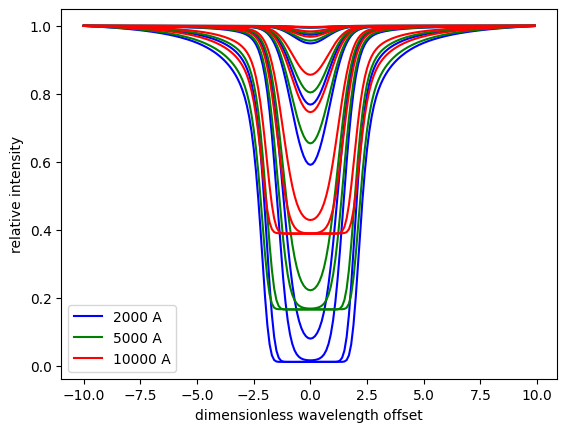

In [ ]:
plt.figure()
plt.xlabel('dimensionless wavelength offset')
plt.ylabel('relative intensity')

Ts = 5700      # solar surface temperature
Tl = 4200      # solar T-min temperature = 'reversing layer'
a = 0.1        # damping parameter
wav = [2000, 5000, 10000] # wavelength [angstrom]
tau0 = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
clrs = ['b', 'g', 'r']
x  = np.arange(-10, 10, 0.1)
intensity = np.zeros_like(x)
for iw in range(1, 4):
    w = (iw**2+1)*1e-5
    for itau in range(len(tau0)):
        for i in range(len(x)):
            tau = tau0[itau] * H(x[i], a)
            intensity[i] = planck(Ts, w) * np.exp(-tau) + planck(Tl, w) * (1 - np.exp(-tau))
        if itau == 0:
            plt.plot(x, intensity/np.max(intensity), clrs[iw-1], label=f'{wav[iw-1]} A')
        else:
            plt.plot(x, intensity/np.max(intensity), clrs[iw-1])
plt.legend()
plt.show()

### The equivalent width of spectral lines

In [ ]:
def profile(a, tau0, x):
    """
    return a Schuster-Schwarzschild profile
    input:
        a (damping parameter)
        tau0 (SS layer thickness at line center)
        x (wavelength array in Doppler units)
    output:
        intensity array
    """
    Ts = 5700
    Tl = 4200
    wav = 5000e-8
    intensity = np.zeros_like(x)
    for i in range(len(x)):
        tau = tau0 * H(x[i], a)
        intensity[i] = planck(Ts, wav) * np.exp(-tau) + planck(Tl, wav) * (1 - np.exp(-tau))
    return intensity

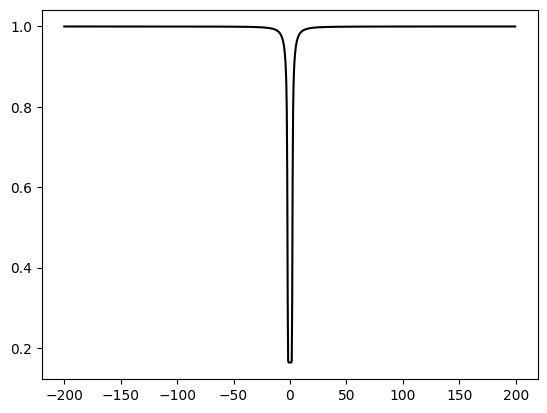

In [ ]:
x = np.arange(-200, 200, 0.4)
a = 0.1
tau0 = 1e2
intensity = profile(a, tau0, x)
plt.plot(x, intensity/np.max(intensity), c='k')
plt.show()

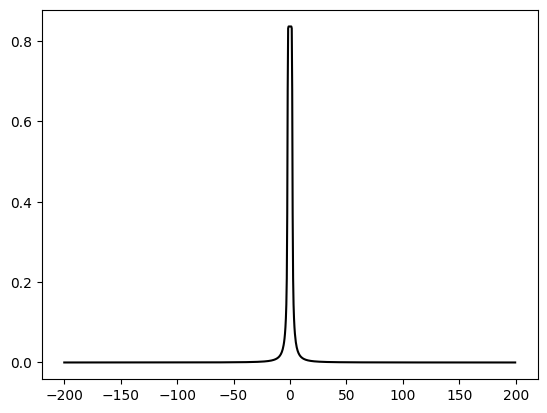

4.902312062719566


In [ ]:
reldepth = (intensity[0] - intensity)/intensity[0]   # line depth in relative units
plt.plot(x, reldepth, c='k')
plt.show()
eqw = np.sum(reldepth) * 0.4       # equivalent width
print(eqw)

### The curve of growth

In [ ]:
tau0 = 10**(np.arange(61)/10 - 2)  # 10^-2 to 10^4, 0.1 steps in the log
eqw = np.zeros_like(tau0)
for i in range(len(tau0)):
    intensity = profile(a, tau0[i], x)
    reldepth = (intensity[0] - intensity)/intensity[0]
    eqw[i] = np.sum(reldepth) * 0.4

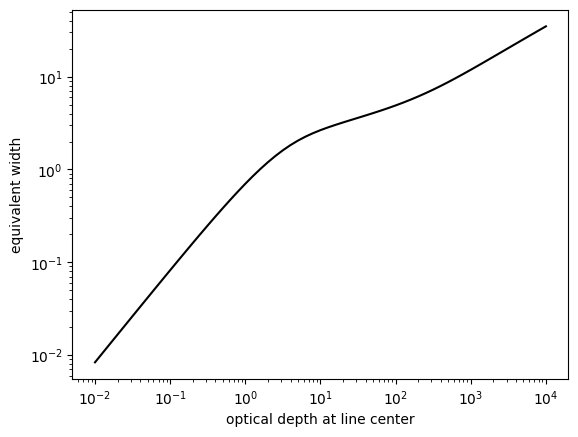

In [ ]:
plt.plot(tau0, eqw, c='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('optical depth at line center')
plt.ylabel('equivalent width')
plt.show()